In [1]:
import pandas as pd
import re
from collections import Counter
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import json
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
file='./files/expense_data.txt'
with open(file) as json_file:
    allDict = json.load(json_file)
sizes=[]
articleNums=[]
singlearts=[]
for a in allDict:
  job = allDict[a]["job"]
  sizes.append(len(job))
  articleNums.extend(job.keys())
  if len(job)==1:
    singlearts.extend(job.keys())


max: 961  min: 1  avg: 12.114573873141818
Counter({1: 10080, 2: 9913, 3: 6629, 4: 4711, 5: 3675, 6: 2909, 7: 2354, 8: 1967, 9: 1724, 10: 1407, 11: 1256, 12: 1075, 13: 936, 14: 861, 15: 824, 16: 726, 18: 638, 17: 621, 20: 517, 19: 513, 21: 432, 22: 397, 23: 388, 24: 366, 25: 333, 26: 313, 27: 276, 30: 269, 28: 258, 29: 247, 31: 230, 32: 222, 34: 207, 33: 192, 38: 183, 40: 177, 36: 172, 35: 169, 37: 160, 39: 152, 44: 142, 43: 142, 42: 135, 41: 131, 46: 125, 45: 122, 48: 119, 49: 113, 47: 111, 51: 106, 50: 92, 54: 88, 53: 85, 63: 83, 55: 83, 59: 78, 56: 77, 58: 77, 61: 74, 52: 74, 60: 73, 57: 72, 62: 64, 68: 61, 67: 59, 65: 58, 64: 57, 70: 51, 66: 50, 78: 47, 73: 47, 69: 47, 79: 46, 71: 45, 74: 44, 77: 39, 81: 38, 72: 38, 76: 38, 83: 36, 75: 36, 86: 36, 85: 31, 89: 30, 84: 30, 80: 29, 82: 28, 92: 28, 93: 28, 91: 27, 101: 25, 99: 25, 87: 25, 94: 25, 90: 24, 102: 24, 97: 24, 95: 22, 88: 20, 104: 19, 106: 19, 98: 19, 109: 18, 100: 18, 111: 17, 103: 17, 112: 16, 96: 15, 116: 14, 107: 13, 119:

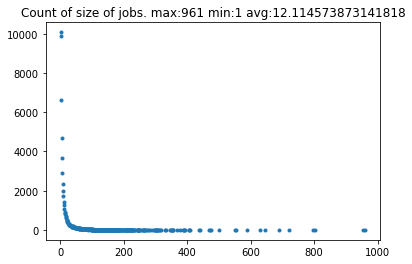

Counter({'NaN': 9573, '1004': 6500, '1001': 6218, '1003': 6090, '5020374': 4244, '1002': 4218, '1006': 3751, '2214506': 3287, '2215324': 3094, '2214536': 3072, '2214539': 3053, '5020395': 3004, '2215333': 2985, '2207077': 2981, '5002203': 2977, '2215325': 2959, '5111515': 2800, '5020504': 2695, '2214502': 2676, '2207022': 2620, '2215334': 2599, '2207031': 2543, '1005': 2433, '5020397': 2409, '5020375': 2379, '2215316': 2375, '2214542': 2310, '2214534': 2298, '1007': 2179, '2215318': 2143, '5111513': 2096, '2207023': 2077, '2000': 2075, '5111633': 2009, '5020429': 1997, '2207078': 1984, '5066718': 1907, '1014': 1848, '5055874': 1843, '1011': 1795, '2215346': 1790, '5020144': 1785, '2207058': 1781, '2215345': 1775, '5111835': 1750, '2207032': 1724, '5111631': 1691, '5067127': 1609, '5112094': 1608, '5112634': 1565, '2214504': 1551, '2207024': 1550, '5665004': 1547, '1012': 1544, '1013': 1538, '1008': 1493, '2214061': 1475, '2225039': 1456, '5066709': 1453, '1010': 1444, '5067147': 1434, 

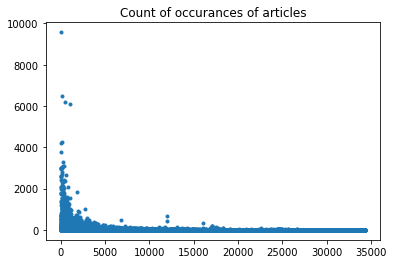

In [ ]:
import matplotlib.pyplot as plt
print("max:",max(sizes)," min:",min(sizes), " avg:",np.mean(sizes))
c = Counter(sizes)
x=[a for a in c]
y=[c[a] for a in c]
print(c)
plt.plot(x,y,".")
plt.title("Count of size of jobs. max:"+str(max(sizes))+" min:"+str(min(sizes))+" avg:"+str(np.mean(sizes)))
plt.show()

articleCounter = Counter(articleNums)
print(articleCounter)

print(articleCounter.most_common()[:-200:-1] )
plt.plot([a for a in range(len(articleCounter))],[articleCounter[a] for a in articleCounter],".")
plt.title("Count of occurances of articles")
plt.show()

In [ ]:
print(articleCounter.most_common()[::-1] )


[('4229769', 1), ('2011741', 1), ('4220702', 1), ('4200418', 1), ('6096505', 1), ('0987545', 1), ('1541531', 1), ('3410895', 1), ('6026766', 1), ('6320069', 1), ('8357559', 1), ('3104609', 1), ('1305366', 1), ('6121917', 1), ('6122506', 1), ('4341941', 1), ('5037116', 1), ('3535102', 1), ('3535123', 1), ('5116493', 1), ('6026414', 1), ('4532099', 1), ('4514923', 1), ('5011873', 1), ('8710404', 1), ('8710423', 1), ('8710443', 1), ('6067409', 1), ('6296916', 1), ('6296903', 1), ('2228576', 1), ('2399138', 1), ('2399103', 1), ('2399122', 1), ('2398005', 1), ('8015166', 1), ('4225211', 1), ('8378251', 1), ('6312508', 1), ('4418683', 1), ('9043181', 1), ('6087567', 1), ('5053303', 1), ('8377175', 1), ('6137739', 1), ('4229758', 1), ('4229742', 1), ('6137597', 1), ('6137607', 1), ('6136016', 1), ('6137593', 1), ('5047028', 1), ('3020036', 1), ('3077524', 1), ('6122153', 1), ('6122152', 1), ('6122155', 1), ('6122394', 1), ('2392747', 1), ('3541828', 1), ('3541106', 1), ('9848907', 1), ('98219

In [ ]:
print("max",max(articleCounter,key=articleCounter.get),":",articleCounter[max(articleCounter,key=articleCounter.get)],"min",min(articleCounter,key=articleCounter.get),":",articleCounter[min(articleCounter,key=articleCounter.get)])

max 2215325 : 446 min 5112905 : 1


In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 8.4 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
     |████████████████████████████████| 180 kB 51.4 MB/s 
     |████████████████████████████████| 1.1 MB 62.3 MB/s 
     |████████████████████████████████| 217 kB 72.3 MB/s 
     |████████████████████████████████| 145 kB 58.3 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 76 kB 6.5 MB/s 
  Created wheel for jax: filename=jax-0.3.17-py3-none-any.whl size=1217867 sha256=1c7f5a09161d5d62f9d5f661154f2f7638eb613fd7f859900ac7788eb75c2afd
  Stored in directory: /root/.cache/pip/wheels/ef/87/bc/e175212cdfdee1d1930ea2f4163106dd243a0ae02c300108a3
Successfully built jax
  Attempting uninstall: jax
    Found existing installation: jax 0.3.14
    Uninstalling jax-0.3.14:
      Successfully uninstalled jax-0.3.14
  Attempting uninstall: p

ImportError: ignored

In [2]:
import json
def refine(filename = "./files/expenses.csv"):
  exp = pd.read_csv(filename)
  exp = exp.drop(["description","expenseGroupName","expenseDate"],axis = 1)
  exp = exp.fillna(value={"articleName":'',"articleNumber":'',"quantity":1.0})
  jobIDs = exp.jobId.unique()

  item_df = exp
  for art in ["LH","KMT"]:
    item_df = item_df[item_df.priceUnit != art]
  allArticleNums =  item_df.articleNumber.unique()


  allNumberClasses = []
  otherNumberClasses=[]
  for n in allArticleNums:
    if len(n.strip())== 7 and n.strip().isnumeric():
      pass
    else:
      otherNumberClasses.append(n)
      continue
    allNumberClasses.append(int(n.strip()))
  unique_numbers = list(set(allNumberClasses))
  # unique_numbers= allArticleNums.unique().tolist()
  # unique_numbers =list(set([u.strip() for u in unique_numbers]))

  unused_job_ids = []
  for row in item_df.iterrows():
    if not row[1].articleNumber.strip().isnumeric() or not int(row[1].articleNumber.strip()) in unique_numbers:
      unused_job_ids.append(row[1].jobId)


  for j in set(unused_job_ids):
    item_df = item_df[item_df.jobId != j]

  unused_job_ids = []
  item_df_jobID = item_df.jobId.unique()
  for j in jobIDs:
    if not j in item_df_jobID:
      unused_job_ids.append(j)
  
  new_df = exp
  for j in set(unused_job_ids):
    new_df = new_df[new_df.jobId != j]

  item_df = new_df
  for art in ["LH","KMT"]:
    item_df = item_df[item_df.priceUnit != art]
  jobIDs = item_df.jobId.unique()
  time_df = new_df[new_df.priceUnit == "LH"]

  allDict = {}
  for j in tqdm(jobIDs):
    _itemdf = item_df[item_df.jobId == j]
    _timedf = time_df[time_df.jobId == j]
    data ={}
    for row in _itemdf.iterrows():
      if row[1].quantity ==0:
        continue
      if row[1].quantity <0:
        data={}
        break
      if row[1].articleNumber in data:
        data[row[1].articleNumber] += row[1].quantity
      else:
        data[row[1].articleNumber] = row[1].quantity
    time = sum(_timedf.quantity)
    if len(data)==0:
      continue
    if time ==0:# or time > 150:
      continue
    allDict[str(j)]={"job":data,"time":time,"jobID":str(j)}
  with open('./files/expense_data.txt', 'w') as outfile:
    json.dump(allDict, outfile)

In [ ]:
refine()

In [ ]:
import numpy as np
import tensorflow as tf
import json
#CREATE_MODEL
divideNum=1
base_learning_rate = .001
myloss = "mse"
def create_model(input_num,train=False):
  print(input_num)
  model = tf.keras.Sequential()
  # model.add(tf.keras.layers.Dense(input_num//20, input_shape=(input_num,)))
  if train:
    # model.add(tf.keras.layers.Dense(1, input_shape=(input_num,)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
            loss=myloss,
            metrics=['accuracy'])
  else:
    model.add(tf.keras.layers.Dense(1, input_shape=(input_num,),activation="relu"))
  return model

def getLables(file='./files/expense_data.txt'):
  unique_numbers=[]
  with open(file) as json_file:
    allDict = json.load(json_file)
    for k in allDict:
      unique_numbers.extend(allDict[k]['job'].keys())
  unique_numbers = list(set(unique_numbers)) 
  for i in range(len(unique_numbers)):
    unique_numbers[i] = int(unique_numbers[i])//divideNum
  unique_numbers = list(set(unique_numbers))
  unique_numbers.sort()
  labels2 = unique_numbers + ["totalItems","sumItems","time"]
  return labels2
def dict_to_row(item,labels):
  x = np.zeros(len(labels)-1)
  count_found = []
  for key in item:
    if not str(key).isnumeric():
        continue
    pos = labels.index(int(key)//divideNum) if int(key)//divideNum in labels else -5
    if pos == -5 :
        continue
    count_found.append(key)
    x[pos] += item[key]
    x[-3] +=1
    x[-2] +=item[key]
  return x,count_found

def refineTo(file='./files/expense_data.txt'):
  with open(file) as json_file:
    allDict = json.load(json_file)
    newDict = {}
    for key in allDict:
      t = allDict[key]['time']
      if (t<= 200 and t>5) or np.random.random()<.2:
        newDict[key] = allDict[key]
    nwfile = './files/expense_data_r.txt'
    with open(nwfile,'w') as n_file:
      json.dump(newDict,n_file)
    return nwfile
def run(file='./files/expense_data.txt'):
  labels = getLables(file)
  with open(file) as json_file:
    allDict = json.load(json_file)
    x = np.zeros((len(allDict),len(labels)))
    for i,key in enumerate(allDict):
      item = allDict[key]['job']
      _x,_ = dict_to_row(item,labels)
      x[i]=[*_x,allDict[key]['time']]
    
    print('built')
    train_dataset = tf.data.Dataset.from_tensor_slices((x[:,:-1], x[:,-1]))
    print('build 2')
    dataset =train_dataset.batch(10).shuffle(len(x))
    print('build 3')
    # vals = np.array([x[i,:] for i in np.random.choice(len(x),int(len(x)*.8))])
    # val_dataset = tf.data.Dataset.from_tensor_slices((vals[:,:-1], vals[:,-1]))
    # dataset = val_dataset.batch(100).shuffle(len(vals))

    input_len = len(labels)-1
    
    try:
      model = create_model(input_len,train=True)
      # model.load_weights("./m1checkpoints/point")
      model.fit(dataset, epochs=120,verbose=0)
    except:
      model = create_model(input_len,train=True)
      model.fit(dataset, epochs=120,verbose=0)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/100),
                    loss=myloss,
                    metrics=['accuracy'])
    model.fit(dataset, epochs=120,verbose=0)
    model.fit(dataset, epochs=20)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10000),
                    loss=myloss,
                    metrics=['accuracy'])
    model.fit(dataset, epochs=100,verbose=0)
    model.fit(dataset, epochs=20)
    

    model.save_weights('./m1checkpoints/point')
    # tfjs.converters.save_keras_model(model,"./tfjs1")
run()


built
build 2
build 3
16319


In [ ]:
run()

In [1]:
#####KOBBB

import numpy as np
import tensorflow as tf
import json

with open("./files/Akkord_Kobling.json") as json_file2:
    kobbDict = json.load(json_file2)
#CREATE_MODEL
base_learning_rate = .001
myloss = "mse"
def create_model(input_num,train=False):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(input_num//2, input_shape=(input_num,)))
  if train:
    # model.add(tf.keras.layers.Dense(1, input_shape=(input_num,)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
            loss=myloss,
            metrics=['accuracy'])
  else:
    model.add(tf.keras.layers.Dense(1, input_shape=(input_num,),activation="relu"))
  return model

def getLables(file='./files/expense_data.txt'):
  unique_numbers=[]
  with open(file) as json_file:
    allDict = json.load(json_file)
    for k in allDict:
      unique_numbers.extend(allDict[k]['job'].keys())
  unique_numbers = list(set(unique_numbers)) 
  unique_numbers.sort()
  labels2 = unique_numbers + ["totalItems","sumItems","time"]
  return labels2
def new_dict_to_row(item,labels):
  x = np.zeros(len(labels)-1)
  count_found = []
  for key in item:
    pos = labels.index(key) if key in labels else -5
    if pos == -5 :
        continue
    count_found.append(key)
    x[pos] += item[key]
    x[-3] +=1
    x[-2] +=item[key]
  return x,count_found
def dict_to_row(old_item,labels):
  x = np.zeros(len(labels)-1)
  count_found = []
  for key in item:
    newkey = kobbDict[key] if key in kobbDict else key
    pos = labels.index(newkey) if newkey in labels else -5
    if pos == -5 :
        continue
    count_found.append(key)
    x[pos] += item[key]
    x[-3] +=1
    x[-2] +=item[key]
  return x,count_found

def run(file='./files/expense_kobb.txt'):
  labels = getLables(file)
  with open(file) as json_file:
    allDict = json.load(json_file)
    x = np.zeros((len(allDict),len(labels)))
    for i,key in enumerate(allDict):
      item = allDict[key]['job']
      _x,_ = new_dict_to_row(item,labels)
      x[i]=[*_x,allDict[key]['time']]
    
    train_dataset = tf.data.Dataset.from_tensor_slices((x[:,:-1], x[:,-1]))
    dataset =train_dataset.batch(80).shuffle(len(x))

    # vals = np.array([x[i,:] for i in np.random.choice(len(x),int(len(x)*.8))])
    # val_dataset = tf.data.Dataset.from_tensor_slices((vals[:,:-1], vals[:,-1]))
    # dataset = val_dataset.batch(100).shuffle(len(vals))

    input_len = len(labels)-1
    
    try:
      model = create_model(input_len,train=True)
      model.load_weights("./m1checkpoints/point")
      model.fit(dataset, epochs=220,verbose=0)
    except:
      model = create_model(input_len,train=True)
      model.fit(dataset, epochs=80,verbose=0)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/100),
                    loss=myloss,
                    metrics=['accuracy'])
    model.fit(dataset, epochs=220,verbose=0)
    model.fit(dataset, epochs=20)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10000),
                    loss=myloss,
                    metrics=['accuracy'])
    model.fit(dataset, epochs=220,verbose=0)
    model.fit(dataset, epochs=20)
    model.save_weights('./m1checkpoints/point')
run()
####KOBB

FileNotFoundError: ignored

In [ ]:
# n_file = refineTo()
# run(n_file)
# print(len(getLables()))
run()

In [ ]:
getLables()


In [ ]:
def refine():
  labels = getLables()
  wrongkeys = []
  allDict={}
  with open('./files/expense_data.txt') as json_file:
    allDict = json.load(json_file)
    for key in allDict:
      item = allDict[key]['job']
      _,pFound = dict_to_row(item,labels)
      if len(pFound) != len(item):
        wrongkeys.append(key)
    for k in wrongkeys:
      del allDict[k]
  print(len(allDict))
  with open('./files/expense_data.txt','w') as json_file:
    json.dump(allDict, json_file)

In [ ]:
refine()

5118


In [ ]:
df = pd.read_csv("./files/expenses.csv")
item_df = df
for art in ["LH","KMT"]:
  item_df = item_df[item_df.priceUnit != art]
jobIDs = item_df.jobId.unique()
time_df = df[df.priceUnit == "LH"]

allDict = {}
for j in tqdm(jobIDs):
  _itemdf = item_df[item_df.jobId == j]
  _timedf = time_df[time_df.jobId == j]
  data ={}
  for row in _itemdf.iterrows():
    if row[1].quantity ==0:
      continue
    if row[1].quantity <0:
      data={}
      break
    if row[1].articleNumber in data:
      data[row[1].articleNumber] += row[1].quantity
    else:
      data[row[1].articleNumber] = row[1].quantity
  time = sum(_timedf.quantity)
  if len(data)==0:
    continue
  if time ==0:# or time > 150:
    continue
  allDict[str(j)]={"job":data,"time":time,"jobID":str(j)}

100%|██████████| 76708/76708 [04:24<00:00, 290.21it/s]


In [ ]:
allDict={382938:{"job":{},"time":2,"jobID":7}}

In [ ]:

labels = getLables('./files/expense_kobb_fake.txt')
# usedCols = getUsedCol(labels)
# model2 = create_model(len(usedCols),train=False)
model2 = create_model(len(labels)-1,train=False)
model2.load_weights("./m1checkpoints/point")
fields = ["jobID","real","guess","pFound","len"]
with open('./files/results.csv', 'w') as f:
  f.write(",".join([str(fi) for fi in fields]))
for d in tqdm(allDict):
  item = allDict[d].get("job")
  jobID = allDict[d].get("jobID")

  #item should be a dictionary
  #add error handling
  pNF= 0
  y_hat2=[0,0,0]
  x,p_found = dict_to_row(item,labels)
  #x must be a tensor
  # x=x[usedCols]
  y_hat2 = model2.predict(x.reshape(1,len(x)))
  y_hat2 = ["%.2f"%y_h for y_h in y_hat2[0]]
  try:
    time = allDict[d].get("time")
    if len(item)==0:
      print(time)
      continue
    fields = [jobID,time,*y_hat2,"%.2f"%(len(p_found)/len(item)),len(item)]
    # fields = [jobID,time,0,0,len(item)]
    with open('./files/results.csv', 'a') as f:
      f.write("\n"+",".join([str(fi) for fi in fields]))
  except Exception as e:
    print(e)
    raise e

100%|██████████| 62763/62763 [41:59<00:00, 24.91it/s]


In [ ]:
# labels = getLables('./files/expense_kobb.txt')
labels = getLables()

model2 = create_model(len(labels)-1,train=False)
model2.load_weights("./m1checkpoints/point")

fields = ["articleGroup","AKK"]
inputzero = [[0 for i in range(len(labels)-1)]]
outputzero = model2.predict(inputzero)[0]
with open('./files/rev_results.csv', 'w') as f:
  f.write(",".join([str(fi) for fi in fields])+'\n')
  f.write(",".join(["zero",str(outputzero[0])])+'\n')
  input = [[1 if a ==i or a>=len(labels)-3 else 0 for a in range(len(labels)-1) ] for i in range(len(labels)-3)]
  output = model2.predict(input)
  for i in range(len(labels)-3):
    f.write(",".join([str(labels[i]),str(output[i][0])])+'\n')


In [ ]:
import json
with open('./files/expense_data.txt', 'w') as outfile:
    json.dump(allDict, outfile)

In [ ]:
from collections import Counter
import json

##use with recomender.recommend( *[ articleNum1, articleNum2, articleNum3 ] )
##      or recomender.recommend( articleNum1, articleNum2, articleNum3 )
def init(articlenums):
    for i in range(len(articlenums)):
      articlenums[i]= str(articlenums[i])
    with open('./files/expense_data.txt') as json_file:
        allDict = json.load(json_file)
        neededDict = {}
        for k in allDict:
            job = allDict[k]["job"]
            vals = []
            for a in articlenums:
                if a in job:
                    vals.append(job[a])
            if len(vals)>0:
                v = sum(vals)/len(vals)
                for j in job:
                    job[j]=job[j]/v
                neededDict[k]=job
        dict_a= dict_add([neededDict[k] for k in neededDict])
        return dict_a

def dict_add(dicts):
    d={}
    for d1 in dicts:
        for item in d1:
            if item in d:
                d[item]+=d1[item]
                # d[item]+=1
            else:
                d[item]=d1[item]
                # d[item]=1
    return d
def dict_eval(dict1,keys):
    nm=1000
    val=0
    length=0
    for k in keys:
        if not str(k) in dict1:
            continue
        val += dict1[k]
        length+=1
        del dict1[k]
    if length ==0:
      raise Exception("No Keys found")
    val = val/length
    retDict = {}
    for k,v in sorted(dict1.items(),key=lambda item: item[1]):
      retDict[k]= v/val
      if len(retDict)>9:
        break
    return retDict
def recommend(keys):
    return dict(dict_eval(init(keys),keys))

In [ ]:
print(dict(recommend([6023039,6025426,4200269,2462007,2215358,3511109])))

{'9416615': 0.0008417508417508417, '9507741': 0.0009712509712509713, '3466844': 0.0016835016835016834, '2445741': 0.0019425019425019425, '2445732': 0.0019425019425019425, '9822287': 0.0025252525252525255, '3540246': 0.0025252525252525255, '9822029': 0.0025252525252525255, '9827508': 0.0025252525252525255, '9836601': 0.0025252525252525255}


In [ ]:
from google.colab import files
import os
folder = "./checkpoints"
for f in os.listdir(folder):
  files.download(folder+'/'+f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import os
folder = "./checkpoints"
for f in os.listdir(folder):
  files.download(folder+'/'+f)
# files.download('./checkpoints/checkpoint')
# files.download('./checkpoints/point.index')
# files.download('./checkpoints/point.data-00000-of-00001')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In All


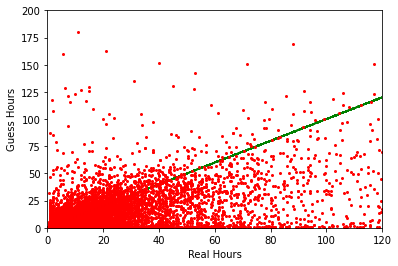

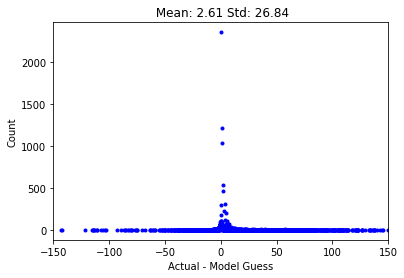

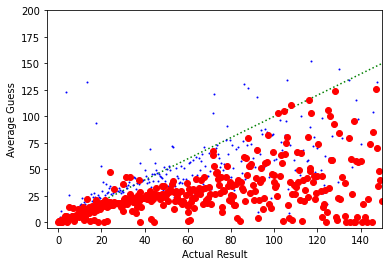

In 99%


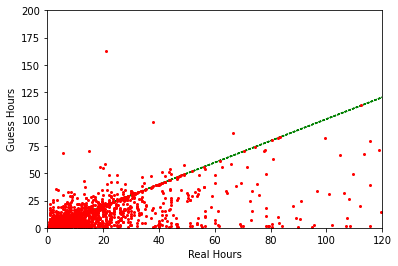

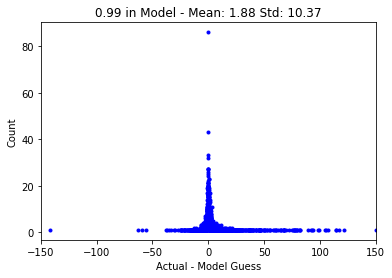

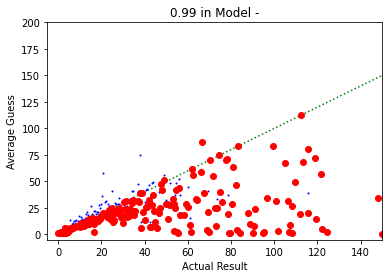

In [ ]:
from matplotlib import pyplot as plt
outlier = False
p_val = .99
full_df = pd.read_csv("./files/results.csv")

for i in range(2):
    res_df = full_df
    color = "b."
    if i:
        print("In 99%")
        res_df = res_df[res_df.pNFound>p_val]
        name = "files/halfGraph"
        pretitle = "%.2f"%(p_val)+" in Model -"
    else:
        print("In All")
        name = "files/fullGraph"
        pretitle = ''
    name+="0.png"
    y_hat = res_df.guess
    y_tru = res_df.real
    vals = y_tru-y_hat
    x = y_tru
    y = y_hat
    plt.plot(x,x,'g:')
    plt.plot(x,y,'ro',markersize=2)
    plt.xlim(0,120)
    plt.ylim(0,200)
    plt.xlabel("Real Hours")
    plt.ylabel("Guess Hours")
    plt.show()
    factor = 100
    c=Counter([int(a*factor)/factor for a in vals]) 
    if outlier:
        x = [x for x in c if c[x]>1]
    else:
        x = [x for x in c]
    y = [c[_x] for _x in x]
    std = np.std([x[i] for i in range(len(x)) for j in range(y[i])])
    avg = np.dot(x,y)/sum(y)
    plt.plot(x,y,color)
    plt.xlim(-150,150)
    # plt.ylim(0,200)
    plt.xlabel("Actual - Model Guess")
    plt.ylabel("Count")
    plt.title(pretitle+' Mean: '+"%.2f"%avg+' Std: '+"%.2f"%std)
    plt.show()

    x_1 = y_tru.unique().tolist()
    x_1.sort()
    y_tru_list = y_tru.tolist()
    # print(x_1)
    y_all = [[] for i in range(len(x_1))]
    # print(y_tru_list)
    for a,guess_x in enumerate(y_hat):
      # print(a)
      ind = x_1.index(y_tru_list[a])
      y_all[ind].append(guess_x)
    y_final = []
    y_std = []
    for a,guesses in enumerate(y_all):
      avg = sum(guesses)/len(guesses)
      # y_final.append(avg-x_1[a])
      y_final.append(avg)
      y_std.append(np.std(guesses)+avg)
    plt.plot(x_1,x_1,'g:')
    plt.plot(x_1,y_std,'bo',markersize=1)
    plt.plot(x_1,y_final,'ro')
    plt.xlim(-5,150)
    plt.ylim(-5,200)
    plt.xlabel("Actual Result")
    plt.ylabel("Average Guess")
    plt.title(pretitle)
    plt.show()

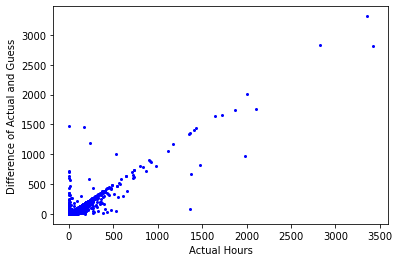

In [ ]:
x = full_df.real
y = abs(full_df.guess- full_df.real)
plt.plot(x,y,'bo',markersize=2)
plt.xlabel("Actual Hours")
plt.ylabel("Difference of Actual and Guess")
plt.show()

NEW STUFF


In [ ]:
'''making New Stuff'''
from keras.models import Model
from tensorflow.keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM, Embedding,Reshape,Conv1D
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
from tqdm import tqdm


In [ ]:
# data = array([[0,2,1,5,2],[4,1,3,7,3]])

# # inputs1 = Input(shape=(3, 2))
# # lstm1, state_h, state_c = LSTM(units, return_state=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init)(inputs1)
# # model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# # data = array([0.1, 0.2, 0.3, 0.1, 0.2, 0.3]).reshape((1,3,2))
# # make and show prediction
# output = model.predict(data)
# print(output.shape)
# print(output)

df = pd.read_csv("./files/expense_3.csv")

allCharacters = list(sorted(set(str(df.articleName.unique())+".")))
def mykey(st):
  return len(str(st))
length = len(max(df.articleName.unique().tolist(), key=mykey))

# LSTM units
units = 112
num_words=len(allCharacters)+1
embedding_size=64

encoder_input = Input(shape=(None,), name='encoder_input')
encoder_embedded = Embedding(input_dim=num_words, output_dim=embedding_size)(
    encoder_input
)
# state = LSTM(units, return_state=True)(encoder_embedded)
# lstm1, state_h, state_c = LSTM(units, return_state=True)(encoder_embedded)
# resh = Reshape((7,16))(state_c)
gru1, state = GRU(units, return_state=True)(encoder_embedded)
#change reshape to a embedding
resh = Reshape((7,16))(state)
dens = Conv1D(10,1)(resh)
dens = Conv1D(10,3,padding="same",activation="softmax")(dens)
model = Model(inputs=encoder_input, outputs=dens)

In [ ]:
def padtext(text,padlength):
  return text.ljust(padlength,".")
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)
def text_to_ids(text):
  chars = tf.strings.unicode_split(text, input_encoding='UTF-8')
  arr = ids_from_chars(chars)
  return arr

ids_from_chars = preprocessing.StringLookup(
    vocabulary=list(allCharacters), mask_token=None)

chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)


In [ ]:

data=[]

for row in tqdm(df.iterrows()):
  try:
    # print(row,row[1].articleNumber)
    # print(row[1].articleNumber,row[1].articleName,text_to_ids(row[1].articleName))
    y_hat = str(row[1].articleNumber)
    if len(y_hat)!=7:
      continue
    y = np.array([int(a) for a in y_hat])
    y=y_hat
    x = row[1].articleName
    data.append([x,y])
  except Exception as e:
    # print(e)
    pass
# data_x=df.articleName
# data_y=[[int(a) for a in str(b)] for b in df.articleNumber]
data = np.array(data)
def create_data(size=1000):
  nums = np.random.choice(len(data),size)
  d = data[nums]
  input_length = len(max(d[:,0], key=mykey))
  
  # x_data = list(map(mapfn,d[:,0]))
  x_data= [text_to_ids(padtext(_d[0],input_length+1)).numpy() for _d in d]
  y_data= [np.array([int(a) for a in _d[1]]) for _d in d]

  # return np.array(x_data),np.array(y_data)
  return x_data,y_data
print(data.shape)
create_data(2)

442797it [01:16, 5773.87it/s] 


(442412, 2)


([array([10, 14,  6, 32, 30, 10,  8, 11,  3, 21, 34,  2, 35, 30, 29, 28, 29,
         32,  2, 33, 27, 16, 32, 34,  2, 16, 31, 35, 16,  2, 30, 26, 35, 33,
          2, 36, 20, 22, 22, 17, 29, 25, 33,  2, 31,  0, 20,  2, 27,  0, 16,
          2, 28, 25, 17,  2, 19, 32,  7]),
  array([25,  0, 44, 42,  0, 42,  0,  0,  0, 44,  2,  0,  0,  0,  8,  0,  0,
          2, 45, 42,  0,  2, 34,  6,  0, 46, 42,  0,  2, 12,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  7,  7])],
 [array([5, 1, 1, 0, 0, 3, 7]), array([5, 1, 2, 5, 1, 2, 6])])

In [ ]:
def create_data1(size=1000):
  nums = np.random.choice(len(data),size)
  d = data[nums]
  # input_length = len(max(d[:,0], key=mykey))
  input_length = length
  
  # x_data = list(map(mapfn,d[:,0]))
  x_data= [text_to_ids(padtext(_d[0],input_length+1)).numpy() for _d in d]
  y_data= [np.array([int(a) for a in _d[1]]) for _d in d]

  # return np.array(x_data),np.array(y_data)
  return x_data,y_data

In [ ]:
import timeit
timeit.timeit(stmt="create_data()",setup="from __main__ import create_data",number=1000)

2131.1435632049997

In [ ]:
import timeit
timeit.timeit(stmt="create_data1()",setup="from __main__ import create_data1",number=1000)

ImportError: ignored

In [ ]:
a
lossfn = tf.keras.losses.SparseCategoricalCrossentropy()
def loss(y_tru,y_pred):
  l = lossfn(y_tru,y_pred)
  # print(type(l),l)
  l=l.numpy()
  totallen = len(l)
  partLoss = l[l==l]
  l = sum(partLoss)*totallen/len(partLoss)
  return l
model.compile(optimizer=Adam(learning_rate=1e-5),
                    loss=lossfn)
# random.shuffle(json_file)
num_epochs = 5
# test(model_train,40)
num=1000
extra = 0
for i in range(num_epochs):
  input_data,output_data = create_data(num)
  input_data = np.array(input_data)
  output_data = np.array(output_data)
  print(i*num+extra)
  model.fit( x=input_data,  y=output_data,
                batch_size=500, epochs=35,
                validation_split=.1,shuffle=True,verbose=0)
  model.fit( x=input_data,  y=output_data,
                batch_size=500,  epochs=10,
                validation_split=.1,shuffle=True)
  model.save_weights('./checkpoint/point')

0
Epoch 1/10
2/2 [==============================] - 0s 170ms/step - loss: 0.4264 - val_loss: 0.6401
Epoch 2/10


KeyboardInterrupt: ignored

In [ ]:


lossfn = tf.keras.losses.SparseCategoricalCrossentropy()
x,y = create_data(5)

y_hat = model(x)
l=lossfn(y,y_hat)

In [ ]:
np.array(y)

array([list([5, 6, 1, 1, 0, 2, 0]), list([5, 0, 5, 7, 0, 1, 9]),
       list([5, 0, 6, 6, 6, 0, 4]), list([2, 2, 0, 7, 0, 3, 2]),
       list([2, 2, 1, 5, 3, 4, 6])], dtype=object)

In [ ]:
for i in x:
  print(text_from_ids(i))
print(y)
print(np.argmax(y_hat,axis=2))
print(y_hat)

tf.Tensor(b'F 120 BEREDER F/BENK 2K[UNK] [UNK]IQ.', shape=(), dtype=string)
tf.Tensor(b'40 PP BEND [UNK][UNK] SMARTLINE......', shape=(), dtype=string)
tf.Tensor(b'1/2 MESS ALBU I/U G[UNK]ENGER [UNK]2.', shape=(), dtype=string)
tf.Tensor(b'3/4R MESS ANS NIPPEL.........', shape=(), dtype=string)
tf.Tensor(b'3/[UNK] KULEVENTIL M/HE.CIM 11CR.', shape=(), dtype=string)
[[8 0 0 0 1 5 5]
 [2 2 0 7 0 3 1]
 [5 0 2 0 1 4 4]
 [5 0 2 0 3 7 5]
 [5 6 6 5 0 0 3]]
[[6 3 0 0 5 5 8]
 [2 2 0 7 0 3 1]
 [6 6 2 0 7 2 9]
 [5 0 2 0 3 7 3]
 [5 6 4 7 9 8 9]]
tf.Tensor(
[[[7.00520619e-09 1.39624468e-09 5.73671232e-15 1.67832651e-10
   2.00343764e-09 4.01974139e-05 9.99484181e-01 1.66898302e-04
   3.08660063e-04 6.37172271e-09]
  [5.18499910e-08 3.66967901e-09 2.46215379e-03 9.04834330e-01
   6.38872493e-08 1.00526877e-05 1.28290392e-02 7.63839707e-02
   3.48028098e-03 6.31509733e-09]
  [9.82695162e-01 5.58322290e-06 5.43934075e-05 3.12727599e-09
   1.73935154e-11 2.17461049e-11 2.08374333e-13 2.04756725e-04
   

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.ops.gen_math_ops import sigmoid
from tensorflow.keras import layers


# article_ids = df["articleNumber"].unique().tolist()
article_ids = []
article2article_encoded = {}
article_encoded2article = {}

num_articles = 0

model=None
EMBEDDING_SIZE = 50

data=[]

def create_data():
    global  article_ids, article2article_encoded,article_encoded2article, num_articles ,data

    df = pd.read_csv("./files/expense_2.csv")
    article_ids = df["articleNumber"].unique().tolist()
    article2article_encoded = {x: i for i, x in enumerate(article_ids)}
    article_encoded2article = {i: x for i, x in enumerate(article_ids)}
    num_articles = len(df["articleNumber"].unique())
    item_df = df
    for art in ["LH","KMT"]:
        item_df = item_df[item_df.priceUnit != art]
    jobIDs = item_df.jobId.unique()

    data=[]
    for j in jobIDs:
        _itemdf = item_df[item_df.jobId == j]
        jobarticles = _itemdf.articleNumber.unique().tolist()
        for a in jobarticles:
            data.append([[a],jobarticles])

    return data

def selectData(num):
    global data
    nums = np.random.choice(len(data),num)
    d = data[nums]
    x_data= [oneHot(_d[0]) for _d in d]
    y_data= [oneHot(_d[1]) for _d in d]
    return x_data,y_data
def importCSV(filename): 
    global  article_ids, article2article_encoded,article_encoded2article, num_articles ,data

    df = pd.read_csv(filename)
    article_ids = df["articleNumber"].unique().tolist()
    article2article_encoded = {x: i for i, x in enumerate(article_ids)}
    article_encoded2article = {i: x for i, x in enumerate(article_ids)}
    num_articles = len(df["articleNumber"].unique())
    item_df = df
    for art in ["LH","KMT"]:
        item_df = item_df[item_df.priceUnit != art]
    jobIDs = item_df.jobId.unique()

    data=[]
    for j in jobIDs:
        _itemdf = item_df[item_df.jobId == j]
        jobarticles = _itemdf.articleNumber.unique().tolist()
        for a in jobarticles:
            data.append([[a],jobarticles])
    data = np.array(data)

    global model
    inputs = layers.Input(shape=(num_articles))
    dens1 = layers.Dense(num_articles*1.5)(inputs)
    # dens2 = layers.Dense(num_articles*2)(dens1)
    dens3 = layers.Dense(num_articles)(dens1)
    x = tf.nn.sigmoid(dens3)

    model = keras.models.Model(inputs=inputs, outputs=x)
    runAgain()
    runAgain(1e-5)

def oneHot(articles):
    return [1 if a in articles else 0 for a in article_ids]

class RecommenderNet(keras.Model):
    def __init__(self, num_articles, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_articles = num_articles
        
        self.dens1 = layers.Dense(num_articles*2)
        self.dens2 = layers.Dense(num_articles*2)
        self.dens3 = layers.Dense(num_articles)

    def call(self, inputs):
        x=self.dens1(inputs)
        x=self.dens2(x)
        x=self.dens3(x)
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)
def runAgain(lr=5e-4):
    global model
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=lr)
    )
    x_data,y_data = selectData(500)
    model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True)
    for i in range(7):
      print(i)
      x_data,y_data = 0,0
      x_data,y_data = selectData(1000)
      model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True,verbose=0)
    x_data,y_data = 0,0
    x_data,y_data = selectData(500)
    model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True)
    x_data,y_data = 0,0
def predict(articleNums):
    global model
    encoded = oneHot(articleNums)
    pred = model.predict([encoded])
    pred = pred[0]
    retnum=5+len(articleNums)
    top_indices = pred.argsort()[-retnum:][::-1]
    recommended_article_ids = [
        article_ids[x] for x in top_indices
    ]
    return [x for x in recommended_article_ids if x not in articleNums]

In [ ]:
importCSV("./files/expense_2.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Epoch 1/6
10/10 [==============================] - 2s 141ms/step - loss: 0.6927
Epoch 2/6
10/10 [==============================] - 1s 134ms/step - loss: 0.6912
Epoch 3/6
10/10 [==============================] - 1s 133ms/step - loss: 0.6879
Epoch 4/6
10/10 [==============================] - 1s 133ms/step - loss: 0.6802
Epoch 5/6
10/10 [==============================] - 1s 134ms/step - loss: 0.6636
Epoch 6/6
10/10 [==============================] - 1s 133ms/step - loss: 0.6331
0
1
2
3
4
5
6
Epoch 1/6
10/10 [==============================] - 1s 142ms/step - loss: 0.0154
Epoch 2/6
10/10 [==============================] - 1s 134ms/step - loss: 0.0153
Epoch 3/6
10/10 [==============================] - 1s 132ms/step - loss: 0.0152
Epoch 4/6
10/10 [==============================] - 1s 133ms/step - loss: 0.0151
Epoch 5/6
10/10 [==============================] - 1s 133ms/step - loss: 0.0150
Epoch 6/6
10/10 [==============================] - 1s 133ms/step - loss: 0.0149
Epoch 1/6
10/10 [=========

In [ ]:
def predict1(articleNums):
    global model
    encoded = oneHot(articleNums)
    print(encoded)
    pred = model.predict([encoded])
    pred = pred[0]
    print(max(pred),pred)
    retnum=5+len(articleNums)
    top_indices = pred.argsort()[-retnum:][::-1]
    print(top_indices)
    recommended_article_ids = [
        article_ids[x] for x in top_indices
    ]
    return [x for x in recommended_article_ids if x not in articleNums]
predict1(["9301738","5111756","2207022"])

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

['2207077', '2207031', '5111835', '5111515', '5111633', '2207002', '2207078']

In [ ]:
def runAgain(lr=5e-4):
    global model
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=lr)
    )
    x_data,y_data = selectData(500)
    model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True)
    for i in range(7):
      print(i)
      x_data,y_data = 0,0
      x_data,y_data = selectData(1000)
      model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True,verbose=0)
    x_data,y_data = 0,0
    x_data,y_data = selectData(500)
    model.fit(x=x_data, y=y_data,
                batch_size=50, epochs=6,
                shuffle=True)
    x_data,y_data = 0,0
runAgain()

Epoch 1/6


ResourceExhaustedError: ignored

ETIM Deduction

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from keras.models import Model
from tensorflow.keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM, Embedding,Reshape,Conv1D
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import keras
import tensorflow as tf

In [ ]:
df = pd.read_csv("./ETIMguess5.csv")
dforig = df
df = df.drop(["Opprettet"],axis=1)
cols = df.columns
colnum=0
for c in cols[:-1]:
    length = df[c].astype('str').str.len().max()
    df[str(colnum)+"edit"] =df[c].map(lambda x: str(x).ljust(length,'*'))
    colnum+=1
labels = df[cols[-1]].unique().astype("str").tolist()
def func(x):
    if x in labels:
        return labels.index(x)
    return x
df['y'] = df[cols[-1]].map(lambda x: func(x) )
df=df.drop(cols[1:-1],axis=1)
df['x']=df['0edit']+df['1edit']+df['2edit']+df['3edit']+df['4edit']+df['5edit']+df['6edit']
df=df.drop(['0edit','1edit','2edit','3edit','4edit','5edit','6edit'],axis=1)

print("finished rearrange")
testarray = df[df[cols[-1]].isnull()].to_numpy()
trainarray = df[df[cols[-1]].notna()].to_numpy()

allx = "*".join(df.x.tolist())
allcharaters = list(set(allx))
allcharaters.sort()

def convertString(string):
    ret=[]
    for s in string:
        ret.append(allcharaters.index(s))
    return ret

trainx = np.array([convertString(x) for x in trainarray[:,3]])
trainy = np.array(trainarray[:,2]).astype('int')
test  = np.array([convertString(x) for x in testarray[:,3]])


finished rearrange


In [ ]:
units = 500
num_words=len(allcharaters)+1
embedding_size=200

encoder_input = Input(shape=(None,), name='encoder_input')
encoder_embedded = Embedding(input_dim=num_words, output_dim=embedding_size)(
    encoder_input
)
# state = LSTM(units, return_state=True)(encoder_embedded)
# lstm1, state_h, state_c = LSTM(units, return_state=True)(encoder_embedded)
# resh = Reshape((7,16))(state_c)
gru1, state = GRU(units, return_state=True)(encoder_embedded)
x = Dense(len(labels),activation='sigmoid')(state)
model = Model(inputs=encoder_input, outputs=x)

lossfn = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=Adam(learning_rate=1e-5),
            loss=lossfn)

model.fit( x=trainx,  y=trainy,
            batch_size=100, epochs=5,
            validation_split=.2,shuffle=True)

Epoch 1/5
1483/1483 [==============================] - 443s 295ms/step - loss: 5.1176 - val_loss: 9.3484
Epoch 2/5
1483/1483 [==============================] - 438s 296ms/step - loss: 4.6164 - val_loss: 9.9080
Epoch 3/5
1483/1483 [==============================] - 438s 295ms/step - loss: 4.6126 - val_loss: 10.3202
Epoch 4/5
1483/1483 [==============================] - 439s 296ms/step - loss: 4.6116 - val_loss: 10.5983
Epoch 5/5
1483/1483 [==============================] - 438s 295ms/step - loss: 4.6111 - val_loss: 10.9344
